In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [20]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.linear1 = torch.nn.Linear(784, 3)
        
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.linear1(x)
        
        ### ========== TODO : END ========== ###
        return outputs

In [22]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self, hidden_nodes_count = 400):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.linear1 = torch.nn.Linear(784, hidden_nodes_count)
        self.linear2 = torch.nn.Linear(hidden_nodes_count, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        sigmoid = torch.nn.Sigmoid()
        layer_1_outputs = sigmoid(self.linear1(x))
        outputs = self.linear2(layer_1_outputs)
        ### ========== TODO : END ========== ###

        return outputs

In [23]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [24]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [25]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [26]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [27]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs_limit=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs_limit):
        model.train()
        for batch_X, batch_y in train_loader:
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            y_pred = model(batch_X)
            optimizer.zero_grad()
            loss = criterion(y_pred, batch_y)
            loss.backward()
            optimizer.step()
            ### ========== TODO : END ========== ###
            
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Data preparation...
Start training OneLayerNetwork...
| epoch  1 | train loss 1.075398 | train acc 0.453333 | valid loss 1.084938 | valid acc 0.453333 |
| epoch  2 | train loss 1.021364 | train acc 0.566667 | valid loss 1.031102 | valid acc 0.553333 |
| epoch  3 | train loss 0.972648 | train acc 0.630000 | valid loss 0.982742 | valid acc 0.593333 |
| epoch  4 | train loss 0.928398 | train acc 0.710000 | valid loss 0.938953 | valid acc 0.640000 |
| epoch  5 | train loss 0.887963 | train acc 0.783333 | valid loss 0.899045 | valid acc 0.700000 |
| epoch  6 | train loss 0.850839 | train acc 0.826667 | valid loss 0.862485 | valid acc 0.753333 |
| epoch  7 | train loss 0.816627 | train acc 0.850000 | valid loss 0.828852 | valid acc 0.793333 |
| epoch  8 | train loss 0.785000 | train acc 0.886667 | valid loss 0.797807 | valid acc 0.846667 |
| epoch  9 | train loss 0.755688 | train acc 0.900000 | valid loss 0.769067 | valid acc 0.866667 |
| epoch 10 | train loss 0.728461 | train acc 0.903333 |

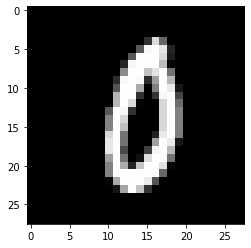

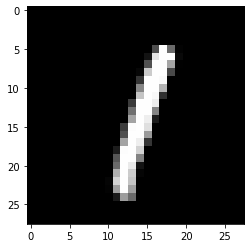

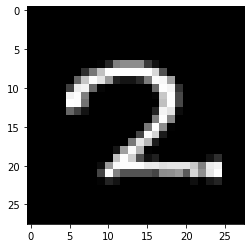

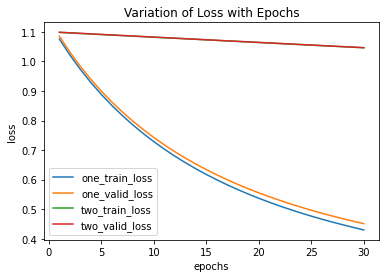

<Figure size 432x288 with 0 Axes>

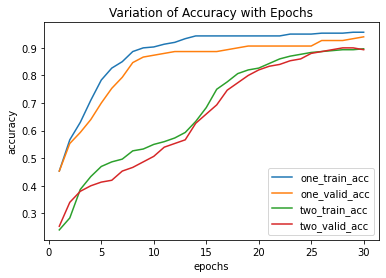

evaluating test accuracy....
test accuracy of 1-layer network = 0.960000
test accuracy of 2-layer network = 0.900000

****************** Modified 2-Layer Network *************************
Start training ModifiedTwoLayerNetwork...
| epoch  1 | train loss 1.864923 | train acc 0.333333 | valid loss 1.854815 | valid acc 0.333333 |
| epoch  2 | train loss 1.014415 | train acc 0.370000 | valid loss 0.997608 | valid acc 0.373333 |
| epoch  3 | train loss 0.458212 | train acc 0.846667 | valid loss 0.457539 | valid acc 0.820000 |
| epoch  4 | train loss 0.264335 | train acc 0.953333 | valid loss 0.279851 | valid acc 0.953333 |
| epoch  5 | train loss 0.198345 | train acc 0.966667 | valid loss 0.222562 | valid acc 0.946667 |
| epoch  6 | train loss 0.159761 | train acc 0.970000 | valid loss 0.189670 | valid acc 0.940000 |
| epoch  7 | train loss 0.134303 | train acc 0.970000 | valid loss 0.168350 | valid acc 0.946667 |
| epoch  8 | train loss 0.116207 | train acc 0.970000 | valid loss 0.153442 |

<Figure size 432x288 with 0 Axes>

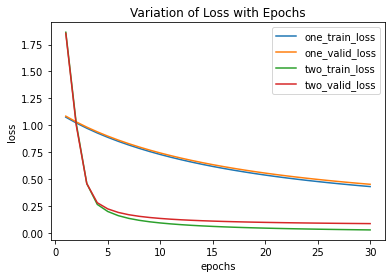

<Figure size 432x288 with 0 Axes>

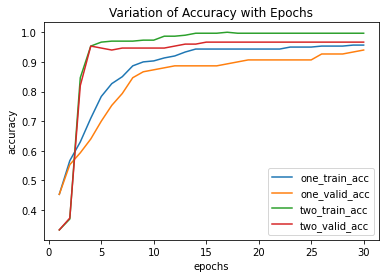

test accuracy of 1-layer network = 0.960000
test accuracy of Modified 2-layer network = 0.973333
****************** END Modified 2-Layer Network *************************

********************* ADAM OPTIMIZER **************************
Start training OneLayerNetwork...
| epoch  1 | train loss 0.697393 | train acc 0.946667 | valid loss 0.688054 | valid acc 0.933333 |
| epoch  2 | train loss 0.477859 | train acc 0.973333 | valid loss 0.479764 | valid acc 0.953333 |
| epoch  3 | train loss 0.359763 | train acc 0.976667 | valid loss 0.368332 | valid acc 0.953333 |
| epoch  4 | train loss 0.289705 | train acc 0.976667 | valid loss 0.302820 | valid acc 0.953333 |
| epoch  5 | train loss 0.243775 | train acc 0.976667 | valid loss 0.260254 | valid acc 0.953333 |
| epoch  6 | train loss 0.211251 | train acc 0.976667 | valid loss 0.230359 | valid acc 0.953333 |
| epoch  7 | train loss 0.186859 | train acc 0.980000 | valid loss 0.208128 | valid acc 0.966667 |
| epoch  8 | train loss 0.167758 | tr

<Figure size 432x288 with 0 Axes>

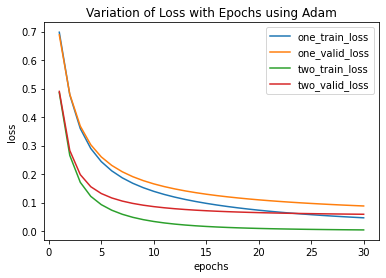

<Figure size 432x288 with 0 Axes>

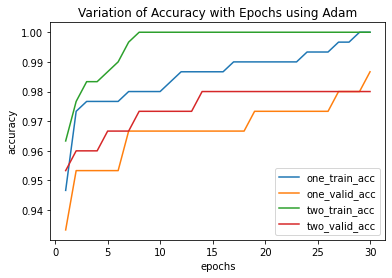

evaluating test accuracy....
test accuracy of 1-layer network = 0.966667
test accuracy of 2-layer network = 0.966667
********************* END ADAM OPTIMIZER **************************


<Figure size 432x288 with 0 Axes>

In [34]:
######################################################################
# main
######################################################################

def main():

    # fix random seed
    np.random.seed(0)
    torch.manual_seed(0)

    # load data with correct file path

    ### ========== TODO : START ========== ###
    data_directory_path =  "/content/drive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_3"
    ### ========== TODO : END ========== ###

    # X.shape = (n_examples, n_features)
    # y.shape = (n_examples, )
    X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
    X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
    X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

    ### ========== TODO : START ========== ###
    ### part a: print out three training images with different labels
    
    # randomly select one training example from each label choice
    for label in np.sort(np.unique(y_train)):
      img_index = np.random.choice(np.where(y_train == label)[0])
      plot_img(X_train[img_index])
    
    ### ========== TODO : END ========== ###

    print("Data preparation...")

    ### ========== TODO : START ========== ###
    ### part b: convert numpy arrays to tensors
    X_train = torch.from_numpy(X_train)
    y_train = torch.from_numpy(y_train)
    X_valid = torch.from_numpy(X_valid)
    y_valid = torch.from_numpy(y_valid)
    X_test = torch.from_numpy(X_test)
    y_test = torch.from_numpy(y_test)
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    # part c: prepare dataloaders for training, validation, and testing
    #         we expect to get a batch of pairs (x_n, y_n) from the dataloader
    # reference: https://www.geeksforgeeks.org/how-to-use-a-dataloader-in-pytorch/
    
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10)
    valid_loader = DataLoader(TensorDataset(X_valid, y_valid), batch_size=10)
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=10)
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    # part e: prepare OneLayerNetwork, criterion, and optimizer
    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)
    ### ========== TODO : END ========== ###

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    ### ========== TODO : START ========== ###
    # part h: prepare TwoLayerNetwork, criterion, and optimizer
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)
    ### ========== TODO : END ========== ###

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### ========== TODO : START ========== ###
    ### part i: generate a plot to comare one_train_loss, one_valid_loss, 
    ###         two_train_loss, two_valid_loss
    epochs = [i for i in range(1, 31)]

    plt.figure(4)
    plt.plot(epochs, one_train_loss)
    plt.plot(epochs, one_valid_loss)
    plt.plot(epochs, two_train_loss)
    plt.plot(epochs, two_valid_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Variation of Loss with Epochs')
    plt.legend(['one_train_loss', 'one_valid_loss', 'two_train_loss', 'two_valid_loss'])
    plt.show()
    plt.savefig('/content/drive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_3/parti.png')
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
    epochs = [i for i in range(1, 31)]

    plt.figure(5)
    plt.plot(epochs, one_train_acc)
    plt.plot(epochs, one_valid_acc)
    plt.plot(epochs, two_train_acc)
    plt.plot(epochs, two_valid_acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('Variation of Accuracy with Epochs')
    plt.legend(['one_train_acc', 'one_valid_acc', 'two_train_acc', 'two_valid_acc'])
    plt.show()
    plt.savefig('/content/drive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_3/partj.png')
    ### ========== TODO : END ========== ##

    ### ========== TODO : START ========== ###
    ### part k: calculate the test accuracy
    print("evaluating test accuracy....")
    print("test accuracy of 1-layer network = %.6f" % evaluate_acc(model_one, test_loader))
    print("test accuracy of 2-layer network = %.6f" % evaluate_acc(model_two, test_loader))

    # train modified 2-layer network
    figure_num = 6
    print("\n****************** Modified 2-Layer Network *************************")
    print("Start training ModifiedTwoLayerNetwork...")
    model_three = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_three.parameters(), lr=0.06)
    results_three = train(model_three, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    # evaluate modified 2-layer network
    three_train_loss, three_valid_loss, three_train_acc, three_valid_acc = results_three

    # compare loss to 1-layer network
    figure_num += 2
    epochs = [i for i in range(1, 31)]
    plt.figure(figure_num)
    plt.plot(epochs, one_train_loss)
    plt.plot(epochs, one_valid_loss)
    plt.plot(epochs, three_train_loss)
    plt.plot(epochs, three_valid_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Variation of Loss with Epochs')
    plt.legend(['one_train_loss', 'one_valid_loss', 'two_train_loss', 'two_valid_loss'])
    plt.show()
    plt.savefig('/content/drive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_3/partk_loss.png')

    # compare accuracy to 1-layer network
    epochs = [i for i in range(1, 31)]
    plt.figure(figure_num+1)
    plt.plot(epochs, one_train_acc)
    plt.plot(epochs, one_valid_acc)
    plt.plot(epochs, three_train_acc)
    plt.plot(epochs, three_valid_acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('Variation of Accuracy with Epochs')
    plt.legend(['one_train_acc', 'one_valid_acc', 'two_train_acc', 'two_valid_acc'])
    plt.show()
    plt.savefig('/content/drive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_3/partk_acc.png')

    # compare test accuracy to 1-layer network
    print("test accuracy of 1-layer network = %.6f" % evaluate_acc(model_one, test_loader))
    print("test accuracy of Modified 2-layer network = %.6f" % evaluate_acc(model_three, test_loader))

    print("****************** END Modified 2-Layer Network *************************")
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
    
    print('\n********************* ADAM OPTIMIZER **************************')

    # train 1-layer network with atom
    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    # 2-layer network with atom
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    # get results for figures
    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    # loss figure
    epochs = [i for i in range(1, 31)]

    figure_num += 1
    plt.figure(figure_num)
    plt.plot(epochs, one_train_loss)
    plt.plot(epochs, one_valid_loss)
    plt.plot(epochs, two_train_loss)
    plt.plot(epochs, two_valid_loss)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Variation of Loss with Epochs using Adam')
    plt.legend(['one_train_loss', 'one_valid_loss', 'two_train_loss', 'two_valid_loss'])
    plt.show()
    plt.savefig('/content/drive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_3/partl_loss.png')
    
    # acc figure
    epochs = [i for i in range(1, 31)]

    figure_num += 1
    plt.figure(figure_num)
    plt.plot(epochs, one_train_acc)
    plt.plot(epochs, one_valid_acc)
    plt.plot(epochs, two_train_acc)
    plt.plot(epochs, two_valid_acc)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('Variation of Accuracy with Epochs using Adam')
    plt.legend(['one_train_acc', 'one_valid_acc', 'two_train_acc', 'two_valid_acc'])
    plt.show()
    plt.savefig('/content/drive/My Drive/schoolwork/3rd_year/winter/cs_m146/hw_3/partl_acc.png')

    # calculate test accuracy
    print("evaluating test accuracy....")
    print("test accuracy of 1-layer network = %.6f" % evaluate_acc(model_one, test_loader))
    print("test accuracy of 2-layer network = %.6f" % evaluate_acc(model_two, test_loader))

    print('********************* END ADAM OPTIMIZER **************************')
    
    ### ========== TODO : END ========== ###



if __name__ == "__main__":
    main()